# Importing the libraries

Importing all the necessary packages for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the datasets

Reading the content of train and test csv files at given path and using comma (,) as default delimiter or separator while parsing a file. 

In [2]:
train_ICU = pd.read_csv('Paitients_Files_Train.csv',delimiter=',')
test_ICU = pd.read_csv('Paitients_Files_Test.csv', delimiter=',')

In [3]:
train_ICU.shape, test_ICU.shape

((599, 11), (169, 10))

There are 599 rows and 11 columns in train and 169 rows and 10 columns in test.

### Project Objective

For an ICU, the ability to predict if a patient in ICU will develop a sepsis is very beneficial. That would assist with reducing the risk of health complications, and managing the ICU resources (such as bed availability, etc.).
In this assignment, we develop a ML model to predict if a patient will develop sepsis in the period of their stay in the ICU, based on provided attributes (features) related to: patient characteristics, diagnoses, treatments, services, hospital charges and patients socio-economic background. 

The machine learning task we are interested in is: “Predict if a given in ICU would not develop a sepsis `(Sepsis Negative / class 0)` or will develop sepsis `(Sepsis Positive / class 1)` during their ICU stay”.

### Target Attribute

Our target attribute is `Sepssis`, which is a nominal categorical feature, which consists of Positive (1) and Negative (0).

The following are the variables in the dataset ICU patients dataset:

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute 1       |  Plasma glucose|
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)|
| PR              | Attribute 3      | Blood Pressure (mm Hg) |
| SK              | Attribute 4      | Blood Work Result-2 (mm)|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)|
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)|
| Age              | Attribute 8      |    patients age  (years)|
| Insurance | N/A     | If a patient holds a valid insurance card|
| Sepssis                 | Target Attribute          | Positive: if a patient in ICU will develop a sepsis, and Negative: otherwise |


In [4]:
train_ICU.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
train_ICU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
test_ICU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


Usually we need to check if there are missing values and identify an action to handle them but since it's already clean. Lets check if the data has any missing values using the pandas describe to see if there are any columns with less number of items than others.

In [7]:
train_ICU.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
test_ICU.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


Since none of the features contain any missing values we don't have to make any changes to the attributes.

**The dataset can now be considered "clean" and it is ready for visualisation and statistical modeling.**

## 1. Data Distribution

Since `ID` does not convey any additional meaning. Hence, we can drop that column.

In [9]:
train_ICU.drop("ID", axis=1, inplace=True)

Plotting a histogram to visuzalize the distribution of each variable so we can get a better idea on which variables to perform normalisation or standardization.

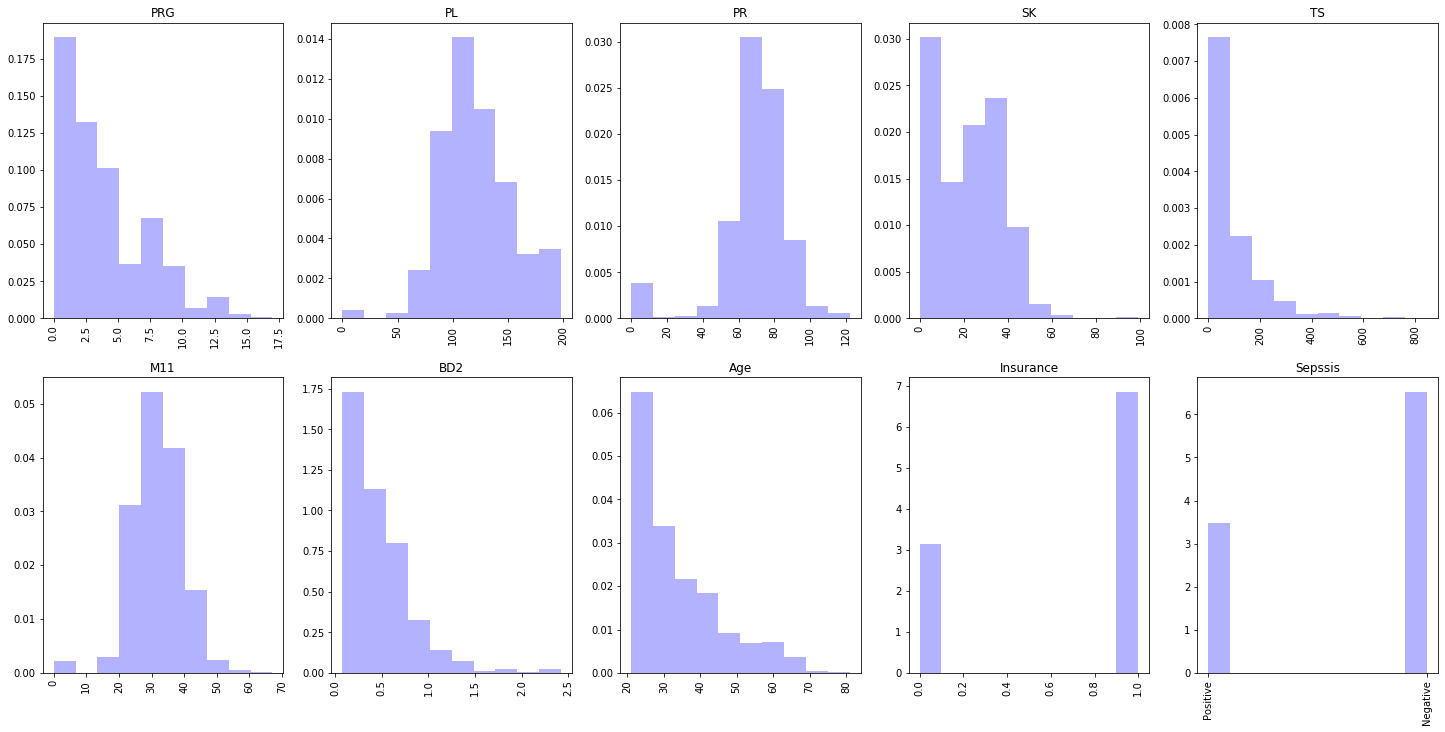

In [10]:
plt.figure(figsize=(25,25))
for i, col in enumerate(train_ICU.columns):
    plt.subplot(4,5,i+1)
    plt.hist(train_ICU[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

> <span style="font-size:1em;"></span> **Observations:** 
> - Target Attribute `Sepsis` is a categorical variable checking whether a patient has sepsis or not. Most data instances are from class 0 and only a few instances are from class 1. 
> - `PRG`, `TS`,`BD2` and `Age` are heavily skewed right. `SK` is slightly skewed to the right.

According to the specification, Negative needs to be changed to a 0 and Positive needs to be changed to a 1. One hot encoding where we would be converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. This is performed on the target variable `Sepssis`.

In [11]:
categorical_cols = train_ICU.loc[:, ~train_ICU.columns.isin(['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])]
categorical_cols

,Sepssis
0,Positive
1,Negative
2,Positive
3,Negative
4,Positive
...,...
594,Negative
595,Positive
596,Negative
597,Negative


In [12]:
for col in categorical_cols:
    n = len(train_ICU[col].unique())
    if (n == 2):
        train_ICU[col] = pd.get_dummies(train_ICU[col], drop_first=True)

train_ICU.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


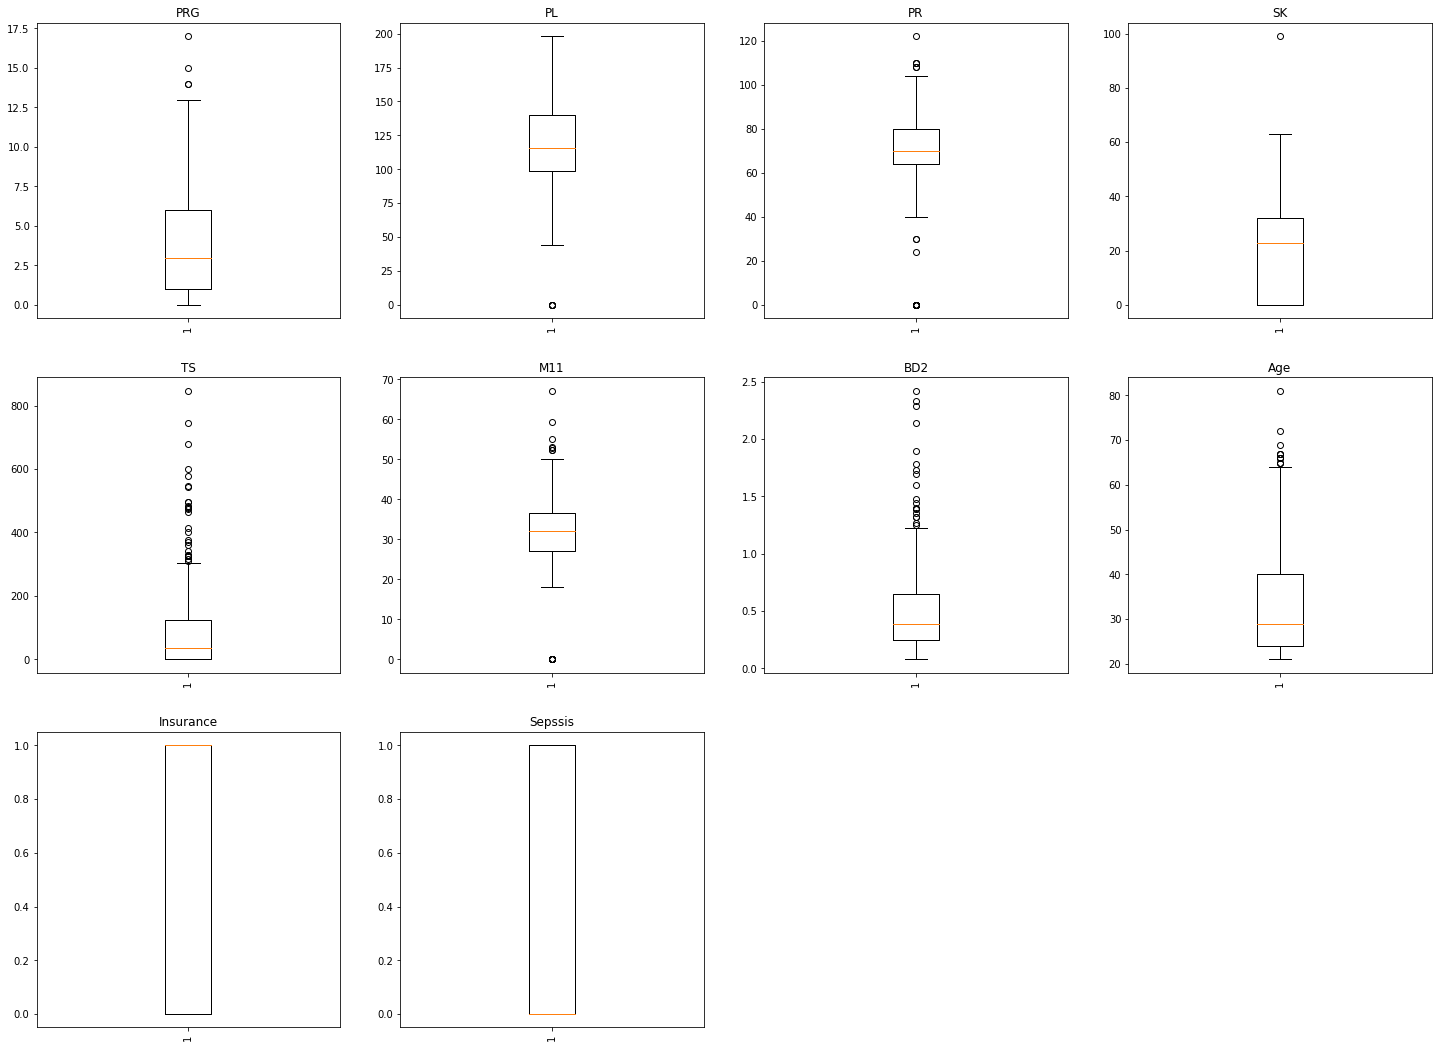

In [13]:
plt.figure(figsize=(25,25))
for i, col in enumerate(train_ICU.columns):
        plt.subplot(4,4,i+1)
        plt.boxplot(train_ICU[col])
        plt.title(col)
        plt.xticks(rotation='vertical')

In [14]:
train_ICU['Sepssis'].value_counts()

0    391
1    208
Name: Sepssis, dtype: int64

In [15]:
test_ICU.drop(['ID'], axis=1, inplace=True)
test_ICU.drop(['Insurance'], axis=1, inplace=True)

In [16]:
train_ICU.drop("Insurance", axis=1, inplace=True)

### 1.1 Multivariate Analysis

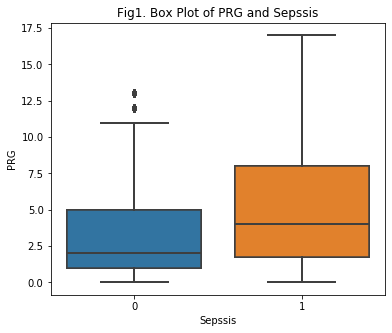

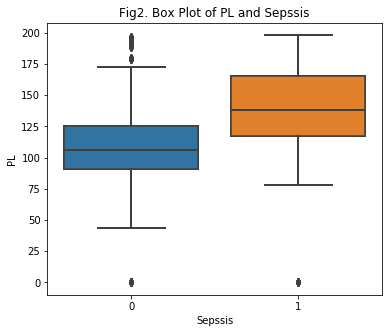

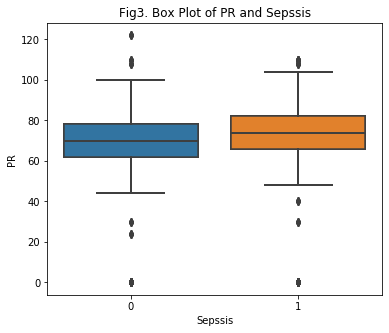

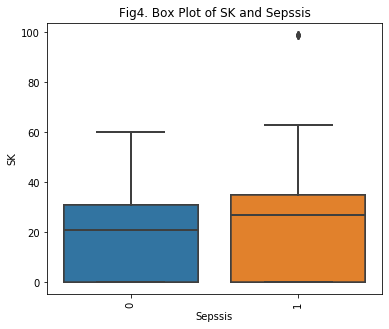

In [17]:
plt.figure(figsize=(6,5))
for i, col in enumerate(train_ICU.columns):
    sns.boxplot(data=train_ICU, x='Sepssis', y='PRG')
    plt.title('Fig1. Box Plot of PRG and Sepssis')
    
plt.figure(figsize=(6,5))
for i, col in enumerate(train_ICU.columns):
    sns.boxplot(data=train_ICU, x='Sepssis', y='PL')
    plt.title('Fig2. Box Plot of PL and Sepssis')
    
plt.figure(figsize=(6,5))
for i, col in enumerate(train_ICU.columns):
    sns.boxplot(data=train_ICU, x='Sepssis', y='PR')
    plt.title('Fig3. Box Plot of PR and Sepssis')

plt.figure(figsize=(6,5))
for i, col in enumerate(train_ICU.columns):
    sns.boxplot(data=train_ICU, x='Sepssis', y='SK')
    plt.title('Fig4. Box Plot of SK and Sepssis')
    
    
plt.xticks(rotation= 'vertical')
plt.show()

>`Fig1`, We notice that patients who have sepssis have a higher PRG value compared to patients who don't have Sepssis, and there are two outliers present in sepssis negatice patients.

>`Fig2`, On average, patients who have sepssis have a higher PL value.

>`Fig3`, sepssis postive patients have a very slightly higher PR value than sepsis negative patients. The difference in minimal and we notice decent number of outliers in both categories.

>`Fig4`, we observe one clear outlier in sepssis positive and the median appears to rather higher than sepsis negative.

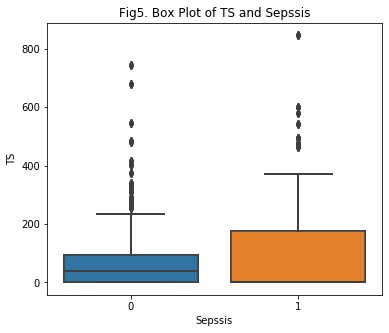

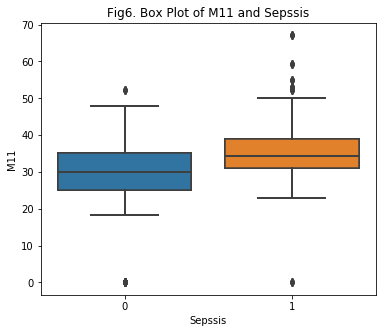

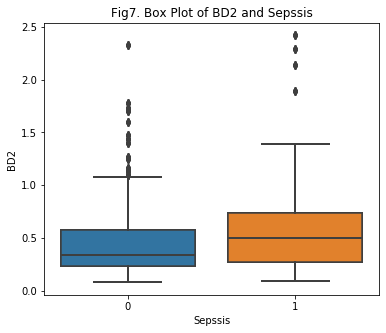

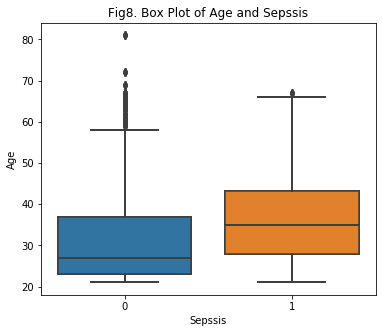

In [18]:
plt.figure(figsize=(6,5))
for i, col in enumerate(train_ICU.columns):
    sns.boxplot(data=train_ICU, x='Sepssis', y='TS')
    plt.title('Fig5. Box Plot of TS and Sepssis')
    
plt.figure(figsize=(6,5))
for i, col in enumerate(train_ICU.columns):
    sns.boxplot(data=train_ICU, x='Sepssis', y='M11')
    plt.title('Fig6. Box Plot of M11 and Sepssis')
    
plt.figure(figsize=(6,5))
for i, col in enumerate(train_ICU.columns):
    sns.boxplot(data=train_ICU, x='Sepssis', y='BD2')
    plt.title('Fig7. Box Plot of BD2 and Sepssis')
    
plt.figure(figsize=(6,5))
for i, col in enumerate(train_ICU.columns):
    sns.boxplot(data=train_ICU, x='Sepssis', y='Age')
    plt.title('Fig8. Box Plot of Age and Sepssis')
    

>`Fig5`, sepssis positive patients have a rather high TS value in contrast to sepssis negative and quite a number of outliers present in class 0 (negative).

>`Fig6`, Patients who have sepssis have a higher M11 value and more outliers present in class(1).

>`Fig7`, sepssis postive patients have a wider spread and have a higher BD2 value than sepsis negative patients. More number of outliers present in class 0 (negative).

>`Fig8`, On average, sepssis positive patients are older compared to sepssis negative and outliers however more outliers are present in class 0 (negative).


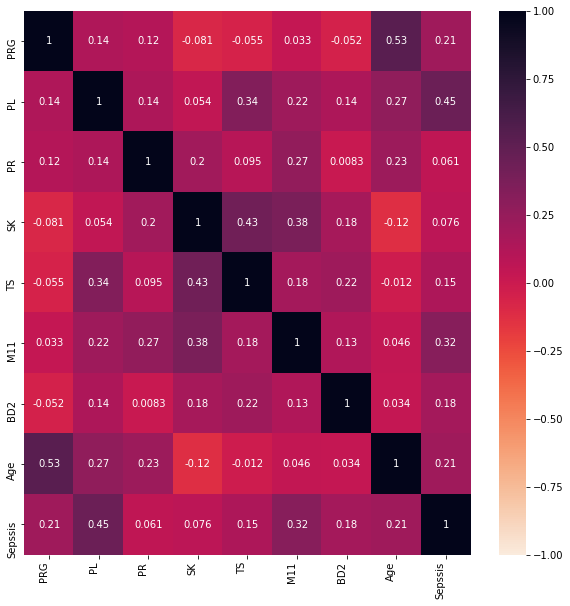

In [19]:
f, ax = plt.subplots(figsize=(10, 10))
corr = train_ICU.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="rocket_r", annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

> As we can see, `Age` and `PRG` have a strong positive correlation.

> `TS` and `SK` also have positive correlation.

> `PL` and `Sepssis` have a strong positive correlation.


In [20]:
train_ICU.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
train_ICU_tree = train_ICU

## Feature Scaling

**Minmax Scaler**: For each feature, each value is subtracted by the minimum value of the respective feature and then divide by the range of original maximum and minimum of the same feature. It has a default range between [0,1].

**Standard Scaler**: rescales each column to have 0 mean and 1 Standard Deviation. It standardizes a feature by subtracting the mean and dividing by the standard deviation. If the original distribution is not normally distributed, it may distort the relative space among the features.

Some variables such as `PRG`, `TS`, `BD2`, `Age` seems to have many outliers causing the distributions to be skewed. In skewed data, the tail region can act as an outlier for the statistical model, and we know that outliers negatively affect model performance, especially in regression-based models. Possibility to test other models. Therefore, the skewed data must be transformed to be close enough to either a Gaussian distribution or a normal distribution. Therefore, we perform feature scaling on these columns, which allows us to try more statistical models.

Since the following variables are skewed, we'll do Min Max scaling...

In [22]:
#PRG
MinMaxScaler_PRG = MinMaxScaler().fit(train_ICU[['PRG']])
PRG_minmax = MinMaxScaler_PRG.transform(train_ICU[['PRG']])


#SK
MinMaxScaler_SK = MinMaxScaler().fit(train_ICU[['SK']])
SK_minmax = MinMaxScaler_SK.transform(train_ICU[['SK']])


#TS
MinMaxScaler_TS = MinMaxScaler().fit(train_ICU[['TS']])
TS_minmax = MinMaxScaler_TS.transform(train_ICU[['TS']])


#BD2
MinMaxScaler_BD2 = MinMaxScaler().fit(train_ICU[['BD2']])
BD2_minmax = MinMaxScaler_BD2.transform(train_ICU[['BD2']])


#Age
MinMaxScaler_age = MinMaxScaler().fit(train_ICU[['Age']])
age_minmax = MinMaxScaler_age.transform(train_ICU[['Age']])



In [23]:
#The following have gaussian distribution, so we will do standard scaling...

#M11
StandardScaler_M11 = StandardScaler().fit(train_ICU[['M11']])
M11_standard = StandardScaler_M11.transform(train_ICU[['M11']])

#PL
StandardScaler_PL = StandardScaler().fit(train_ICU[['PL']])
PL_standard = StandardScaler_PL.transform(train_ICU[['PL']])

#PR
StandardScaler_PR = StandardScaler().fit(train_ICU[['PR']])
PR_standard = StandardScaler_PR.transform(train_ICU[['PR']])

Text(0.5, 1.0, 'PRG - After Min-Max scaling')

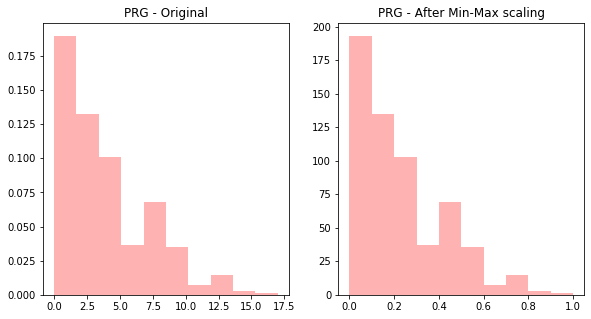

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(train_ICU['PRG'], alpha=0.3, color='r', density=True)
plt.title("PRG - Original")

plt.subplot(1,3,2)
plt.hist(PRG_minmax, alpha=0.3, color='r')
plt.title("PRG - After Min-Max scaling")

# plt.subplot(1,3,3)
# plt.hist(PRG_standard, alpha=0.3, color='r')
# plt.title("PRG - After Standard Scaling")
# plt.show()

Text(0.5, 1.0, 'SK - After Min-Max scaling')

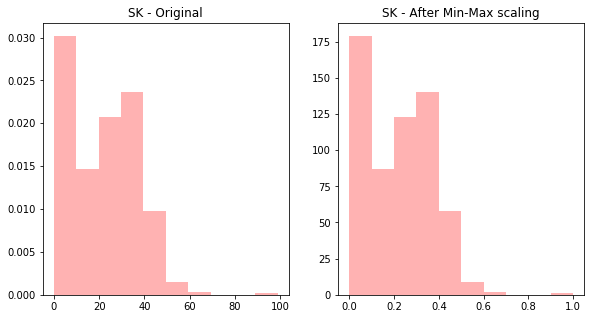

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(train_ICU['SK'], alpha=0.3, color='r', density=True)
plt.title("SK - Original")

plt.subplot(1,3,2)
plt.hist(SK_minmax, alpha=0.3, color='r')
plt.title("SK - After Min-Max scaling")

# plt.subplot(1,3,3)
# plt.hist(SK_standard, alpha=0.3, color='r')
# plt.title("SK - After Standard Scaling")
# plt.show()

Text(0.5, 1.0, 'TS - After Min-Max scaling')

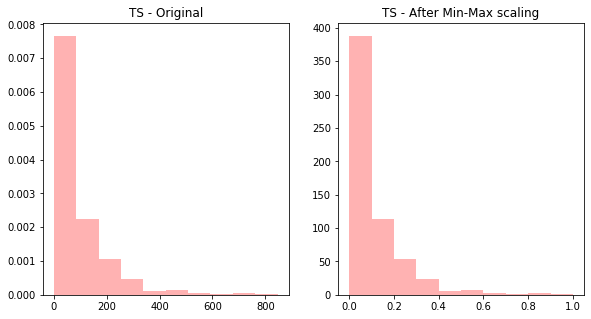

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(train_ICU['TS'], alpha=0.3, color='r', density=True)
plt.title("TS - Original")

plt.subplot(1,3,2)
plt.hist(TS_minmax, alpha=0.3, color='r')
plt.title("TS - After Min-Max scaling")

# plt.subplot(1,3,3)
# plt.hist(TS_standard, alpha=0.3, color='r')
# plt.title("TS - After Standard Scaling")
# plt.show()

Text(0.5, 1.0, 'BD2 - After Min-Max scaling')

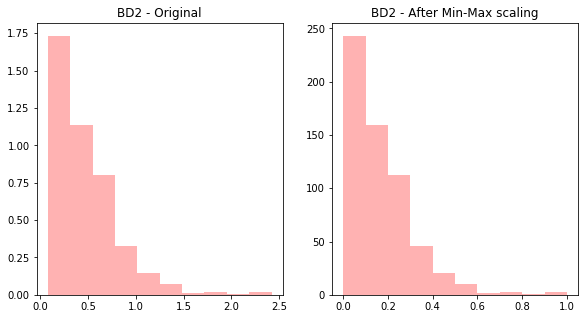

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(train_ICU['BD2'], alpha=0.3, color='r', density=True)
plt.title("BD2 - Original")

plt.subplot(1,3,2)
plt.hist(BD2_minmax, alpha=0.3, color='r')
plt.title("BD2 - After Min-Max scaling")

# plt.subplot(1,3,3)
# plt.hist(BD2_standard, alpha=0.3, color='r')
# plt.title("BD2 - After Standard Scaling")
# plt.show()

Text(0.5, 1.0, 'Age - After Min-Max scaling')

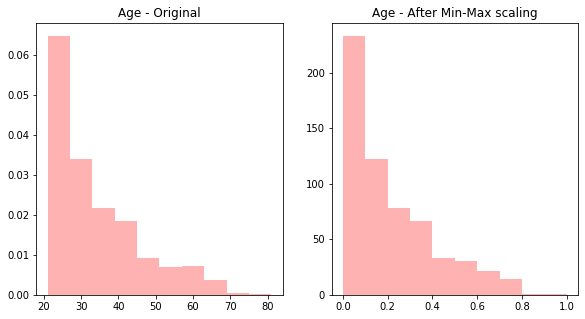

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(train_ICU['Age'], alpha=0.3, color='r', density=True)
plt.title("Age - Original")

plt.subplot(1,3,2)
plt.hist(age_minmax, alpha=0.3, color='r')
plt.title("Age - After Min-Max scaling")

# plt.subplot(1,3,3)
# plt.hist(age_standard, alpha=0.3, color='r')
# plt.title("Age - After Standard Scaling")
# plt.show()

# Model 1 Development

## Logistic Regression

Since the ICU patients is a low dimensional dataset. Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets. One may consider Regularization (L1 and L2) techniques to avoid over-fitting in these scenarios. Good accuracy for many simple data sets and it performs well when the dataset is linearly separable. It makes no assumptions about distributions of classes in feature space and not only provides a measure of how appropriate a predictor(coefficient size) is, but also its direction of association (positive or negative). 

Overall, Logistic regression is easier to implement, interpret, and quite efficient to train. However, some of the the drawbacks include that it can only be used to predict discrete functions. May require a lot of Feature Engineering.

This is an approriate methodology to classify whether a patient has `Sepsis` or not. This method requires high data maintenance and is higher as data preparation which could be tedious. This is brought about by data scaling and normalization. We performed Min-Max scaling along with Standard scaling on appropriate variables to reach normalisation and standardisation. I would like my model to reach the target score of 80%(val).

### Holdout Validation

1. Training: to obtaining the parameters or the weights of the hypothesis
2. Validation: for tuning hyper-parameters and model selection.

In [29]:
with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(train_ICU, test_size=0.2, 
                                             shuffle=True,random_state=0)
    
print(train_data.shape[0], val_data.shape[0])

479 120


In [30]:
# convert the data to np arrays
train_X = train_data.drop(['Sepssis',], axis=1).to_numpy()
train_y = train_data[['Sepssis']].to_numpy()

# test_X = test_data.drop(['Sepssis',], axis=1).to_numpy()
# test_y = test_data[['Sepssis']].to_numpy()

val_X = val_data.drop(['Sepssis',], axis=1).to_numpy()
val_y = val_data[['Sepssis']].to_numpy()

In [31]:
#setup some functions to get the performance.
def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1

### Baseline model¶

I am going to select regularised polynomial logistic regression for this case. Our baseline model can be used to discover the bedrock in performance on your problem by which all other models can be evaluated.
 
There are better models than this, however we only know logistic regression technique that can be used for this problem at the moment, so choices are limited and the decision is simple. If we had other options, we need to use our knowledge on those techniques and the EDA to select the best base model.

The polynomial model is justified because in the EDA we can see that a non-linear decision boundary can separate the classes. regularisation is justified because we have correlated attributes and in EDA we also had some features where a linear decision boundary looked appropriate.

Polynomial features are those features created by raising existing features to an exponent.
As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features. The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.



In [32]:
poly = PolynomialFeatures(3)
poly.fit(train_X)
train_X = poly.transform(train_X)
#test_X = poly.transform(test_X)
val_X = poly.transform(val_X)

When using polynomial features it is very important to scale the features.

In [33]:
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

Let's check the un-regularised linear model.

I chose F1 results because it elegantly summarizes a model's predictive power by combining two otherwise competing metrics: accuracy and recall. Accuracy and recall are metrics that help us evaluate a classification model's predictive performance for a specific class of interest. also called positive class. which also means that both FPs and FNs are taken into account. The higher the accuracy and recovery, the higher the F1 score. The F1 score ranges from 0 to 1. The closer it is to 1 the better the model. F1 scores are for evaluating models depends on the relative impact of FP and FN in your use case. Especially when both types of errors are undesirable, F1score would be more appropriate. This is similar to our case where we do not want patients in the ICU to be sepssis false positives or sepssis false negatives.

Therefore I will select `macro-averaged` `f1_score` as my performance measure and I wish to achieve a target value of 75% f1_score. 

In [34]:
test_data = test_ICU
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1000, 
                         class_weight='balanced').fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.791
Validation F1-Score score: 0.776


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For this baseline model, it achieved it's target valid performance and good traning performance as well. However we can see a slight gap between the Train Accuracy and the Validation Accuracy (generalisation GAP). We should apply regularisation in order to reduce the distance between Train and Valid Accuracy.

## Model 2 : Logistic Regression upon performing Regularisation


We will do grid search to establish a set of lambda values in a grid. Selecting the range of lambda values is a process mostly done with trial and error. Ones we select a set of lambda values, we train a classifier for each of those lambda values and evaluate the performance.  Lowering the variance of the model can improve the model’s accuracy on unseen data. 

In [35]:
test_data = test_ICU

In [36]:
# convert the data to np arrays
train_X_reg = train_data.drop(['Sepssis',], axis=1).to_numpy()
train_y_reg = train_data[['Sepssis']].to_numpy()

# test_X = test_data.drop(['Sepssis',], axis=1).to_numpy()
# test_y = test_data[['Sepssis']].to_numpy()

val_X_reg = val_data.drop(['Sepssis',], axis=1).to_numpy()
val_y_reg = val_data[['Sepssis']].to_numpy()

In [37]:
lambda_paras = np.logspace(-5, 1, num=40)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced').fit(train_X_reg, train_y_reg.ravel())
    
    train_f1, val_f1 = get_f1_scores(clf, train_X_reg, train_y_reg , val_X_reg, val_y_reg)
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

Now lets plot the training and validation performance for each lambda value in out lambda values set and see what is the best lambda value. You might have to repeat the process of selecting lambda values if the results are not as expected.

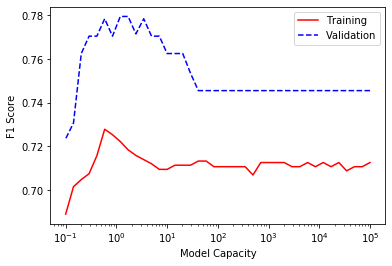

In [38]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

### Using GridSearch CV to identify best parameters

Gridsearching searches the data to determine the optimal parameters for a particular model. Essentially, brute force works through all possible combinations of hyperparameters and saves the metrics for the best-performing combination. Logically, the larger the number of hyperparameters to be tuned, the longer the execution of this method. Another benefit is that  it can be applied to other machine learning models to calculate the best parameters to improve the model. I will be use both a logistic regression model and a random forest classifier.

In [39]:
grid={"C":np.logspace(0,10,num=10), "penalty":["l2"]}

In [40]:
# Grid search cross validation
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(train_X_reg,train_y_reg.ravel())

print("Best parameters:",logreg_cv.best_params_)
print("Accuracy:",logreg_cv.best_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best parameters: {'C': 12.91549665014884, 'penalty': 'l2'}
Accuracy: 0.7766843971631205


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [41]:
clf = LogisticRegression(penalty='l2', C = 12.91549665014884, random_state=0, 
                         solver='liblinear', max_iter=1000, 
                         class_weight='balanced').fit(train_X_reg, train_y_reg.ravel())

train_f1, val_f1 = get_f1_scores(clf, train_X_reg, train_y_reg, val_X_reg, val_y_reg)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.711
Validation F1-Score score: 0.762


There isn't a large gap in the baseline model, but it may indicate that we could get better test set performance with more regularization/introducing more bias to the model. But that does not mean that a smaller gap means a better model; it's just that if we have a small or no gap between training and valid set performance, we know we are definitely not overfitting so adding regularization/introducing more bias to the model will not help. 

After regularization, the valid score appears to be our reach target score, it's underfitting. 
There is also very slight gap between train and valid set which we achieved. 

## Model 3 - Decision Tree

Decision Trees are easy to interpret and explain. Compared to other models, A Decision Tree does not require scaling of data and requires less preparation of data (missing values in the data do not prevent the Decision Tree from making decisions). However, there are prone to overfitting and require a lot of feature engineering to optimize Decision Tree model. Therefore, a Random Forest (made up of many Decision Trees) is often a better predictor. In order to ensure that a Decision Tree is as accurate as possible, one must carefully tune hyperparameters. I will be using Grid Search CV to identify the best parameters to enhance the model.

I want to reach atleast a f1_score of 75%.

In [42]:
data_Y = train_ICU_tree['Sepssis']

In [43]:
data_X = train_ICU_tree
data_X.drop(columns='Sepssis', inplace=True)

In [44]:
with pd.option_context('mode.chained_assignment', None):
    train_data_x, val_data_x, train_data_y, val_data_y = train_test_split(data_X, data_Y, test_size=0.2, 
                                            shuffle=True,random_state=0)
    
print(train_data.shape, val_data.shape)


(479, 9) (120, 9)


In [45]:
train_ICU_tree.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [46]:
# convert the data to np arrays
X_train_tree = train_data_x.to_numpy()
y_train_tree = train_data_y

X_val_tree = val_data_x.to_numpy()
y_val_tree = val_data_y

`Graphviz` is a visualization software which helps in representing structural information as diagrams of abstract graphs like this decision tree.

In [47]:
def get_tree_2_plot(clf):
    dot_data = tree.export_graphviz(clf, out_file=None,   
                      class_names=['Negative Sepssis', 'Positive Sepssis'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
    graph = graphviz.Source(dot_data) 
    return graph

In [48]:
def get_acc_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = f1_score(train_y, train_pred, average='macro')
    val_acc = f1_score(val_y, val_pred, average='macro')
    
    return train_acc, val_acc

In [49]:
poly = PolynomialFeatures(3)
poly.fit(X_train_tree)
X_train_tree = poly.transform(X_train_tree)
X_val_tree = poly.transform(X_val_tree)

The maximum depth of a binary tree is the number of nodes from the root down to the furthest leaf node. In other words, it is the height of a binary tree.

In [50]:
tree_max_depth = 101 #change this value and observe

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, min_samples_split = 87,  class_weight='balanced')
clf = clf.fit(train_X, train_y.ravel())

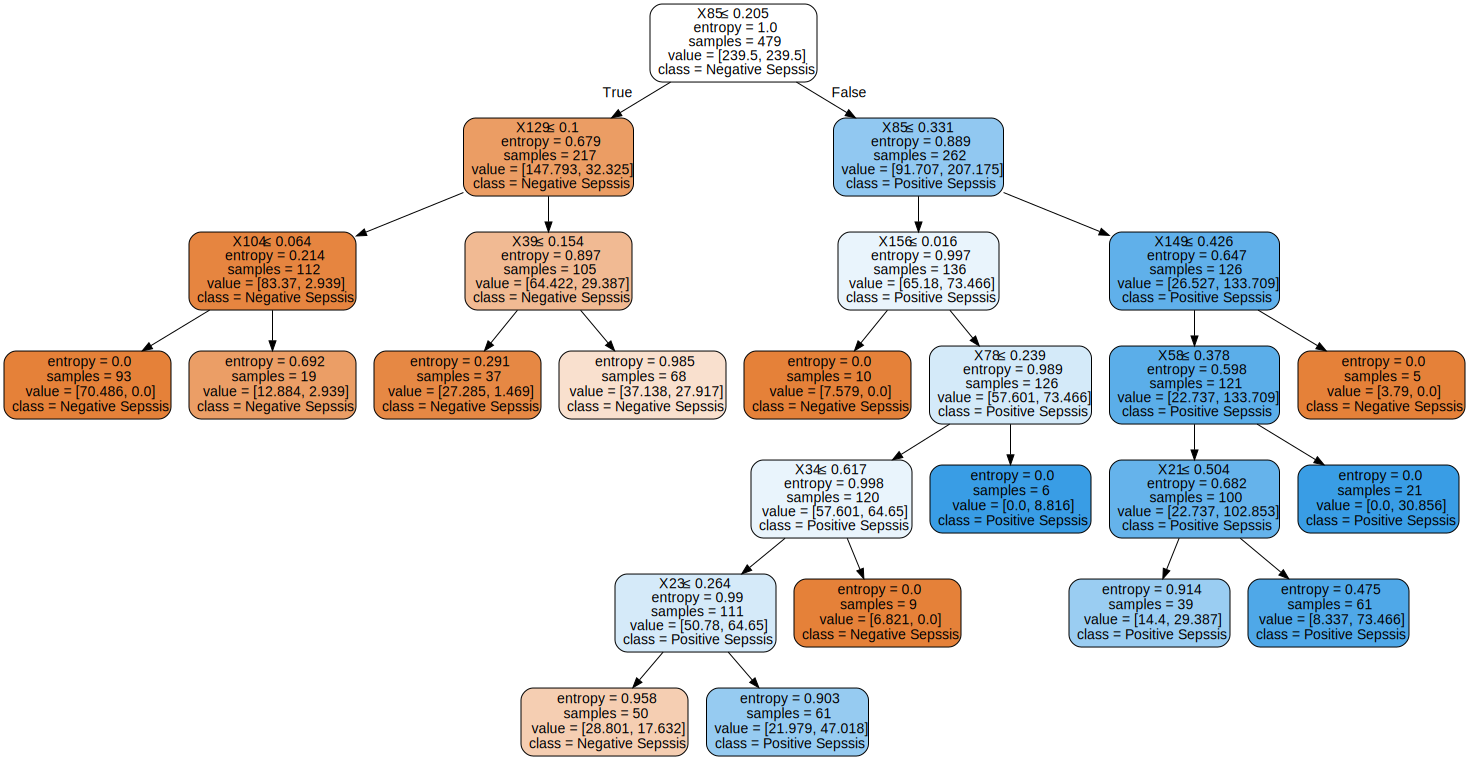

In [51]:
Dtree = get_tree_2_plot(clf)
Dtree

In [52]:
train_acc, val_acc = get_acc_scores(clf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.791
Validation f1 score: 0.720


Unfortunately, it did not reach our target score and it's below the score of our baseline model. So we would have to hyper-tune the model to reach out target score. It appeats to have overfit the data.

## Hyper parameter tuning

To tune the important hyper-paramters of the decision tree classifier (identified in the above question) to get the best performance. As an example I have selected two hyper parameters:  `max_depth` and `min_samples_split`. I will be using GridSearch to tune my parameters. Sklearn has a function that do cross validation to tune the hyper parameters called `GridSearchCV`. I want an accuracy of atleast 75%.

In [53]:
# Performing a grid search to tune the parameters for the decision tree

parameters = {'max_depth':np.arange(1,500, 100), 'min_samples_split':np.arange(1,100,10)}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro')
Gridclf.fit(train_X, train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_g

In [54]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000933,0.000196,0.000000,0.000000,1,1,"{'max_depth': 1, 'min_samples_split': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
1,0.006493,0.000306,0.000818,0.000076,1,11,"{'max_depth': 1, 'min_samples_split': 11}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30
2,0.005229,0.000427,0.000626,0.000050,1,21,"{'max_depth': 1, 'min_samples_split': 21}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30
3,0.004976,0.000111,0.000579,0.000035,1,31,"{'max_depth': 1, 'min_samples_split': 31}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30
4,0.005017,0.000097,0.000591,0.000039,1,41,"{'max_depth': 1, 'min_samples_split': 41}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30
5,0.004778,0.000052,0.000555,0.000018,1,51,"{'max_depth': 1, 'min_samples_split': 51}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30
6,0.004902,0.000208,0.000553,0.000019,1,61,"{'max_depth': 1, 'min_samples_split': 61}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30
7,0.004877,0.000139,0.000550,0.000020,1,71,"{'max_depth': 1, 'min_samples_split': 71}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30
8,0.004714,0.000102,0.000533,0.000009,1,81,"{'max_depth': 1, 'min_samples_split': 81}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30
9,0.004647,0.000032,0.000528,0.000004,1,91,"{'max_depth': 1, 'min_samples_split': 91}",0.760436,0.616851,0.632184,0.654413,0.671053,0.666987,0.050264,30


In [55]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.7068762889424568
{'max_depth': 301, 'min_samples_split': 61}


In [56]:
dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=100,min_samples_split=61)
dt_clf= clf.fit(train_X, train_y.ravel())

In [57]:
train_acc, val_acc = get_acc_scores(clf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.803
Validation f1 score: 0.759


After an exhaustive search for selecting the best parameters applying it to our model. The val score has increased and reached out target score of 75% and a traning score of 80%. 

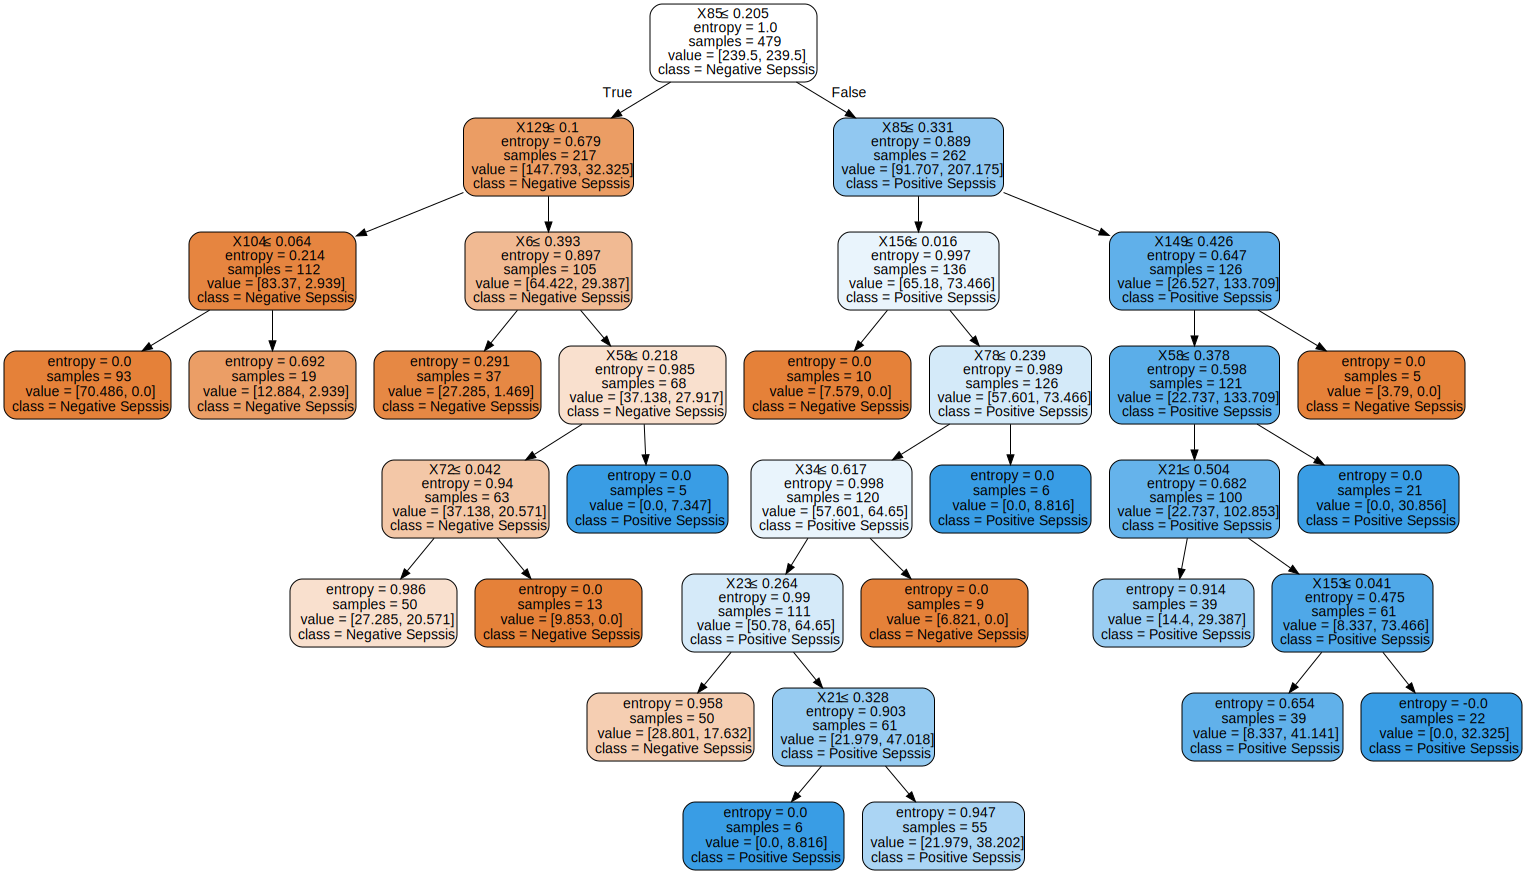

In [58]:
Dtree = get_tree_2_plot(dt_clf)
Dtree

## Post pruning decision trees with cost complexity pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfitting. Those parameters prevent the tree from growing to large size and are examples of pre pruning. 

Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. This algorithm finds the node with the ''weakest link'' characterised by an effective alpha. Then the nodes with the smallest effective alpha are pruned first. as the algorithm works after the tree is grown, this is a post pruning technique. 

In [59]:
clf_dt = tree.DecisionTreeClassifier(class_weight='balanced')
path = clf_dt.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [60]:
clfs_dt = []
for ccp_alpha in ccp_alphas:
    clf_dt = tree.DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha, class_weight = 'balanced')
    clf_dt.fit(train_X, train_y)
    clfs_dt.append(clf_dt)

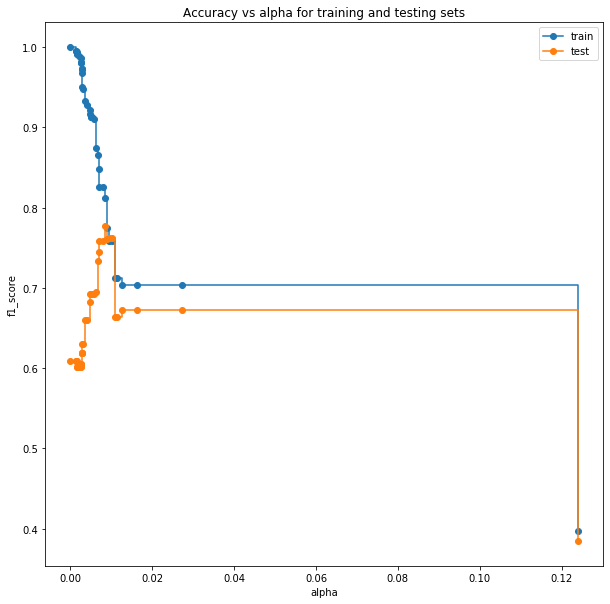

In [61]:
train_scores = [f1_score(train_y, clf_dt.predict(train_X), average='macro') for clf_dt in clfs_dt]
val_scores = [f1_score(val_y, clf_dt.predict(val_X), average='macro') for clf_dt in clfs_dt]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Testing Model 1 - Logistic Regression Baseline Model

In [62]:
poly = PolynomialFeatures(3)
poly.fit(test_ICU)
test_X = poly.transform(test_ICU)

In [63]:
scaler = MinMaxScaler()
scaler.fit(test_X)

test_X = scaler.transform(test_X)

In [64]:
pred_fit=clf.fit(train_X, train_y)

In [65]:
y_pre = pred_fit.predict(test_X)

In [66]:
y_pre

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [67]:
df_test = pd.read_csv('Paitients_Files_Test.csv')

In [68]:
final = pd.DataFrame()
final['ID'] = df_test['ID']
final['Sepssis'] = y_pre


In [69]:
final.head()

,ID,Sepssis
0,ICU200609,0
1,ICU200610,0
2,ICU200611,0
3,ICU200612,0
4,ICU200613,1


In [70]:
final['Sepssis'].replace(to_replace = 0, value = 'Negative', inplace = True)
final['Sepssis'].replace(to_replace = 1, value = 'Positive', inplace = True)

In [71]:
final.head()

,ID,Sepssis
0,ICU200609,Negative
1,ICU200610,Negative
2,ICU200611,Negative
3,ICU200612,Negative
4,ICU200613,Positive


After evaluating 4 models, `1. Logistic Regression`, `2. Logistic Regression after Regularisation`, `3. Decision tree` and `4. Random Forest`, I decided to go ahead with Logistic Regression after Regularisation. This is due to...






In [72]:
final.to_csv('S3856512_predictions.csv', index= False)

After evaluating 4 models, `1. Logistic Regression`, 
`2. Logistic Regression after Regularisation`, 
`3. Decision tree` and `4. Random Forest`, I decided to go ahead with Logistic Regression Baseline Model. 


Fundamentally, a reference model is easy to set up and has a reasonable chance of producing decent results. Experimenting with them is usually quick and inexpensive, as implementations  in popular packages are widespread. 
 
Logistic regression generally gives fast and robust results. Baselines help us put a more complex model into context in terms of accuracy. Another benefit of a baseline is that it's easy to implement and faster to train because there are few parameters to adjust to your data.With our dataset, it computed our target Validation F1-Score score: 0.776 and a decent training score Train F1-Score score: 0.791 with a little bit of over fitting. This model performed the highest compared to my other 3 models with an accuracy score 77%. With a low-dimensional data set, a basic logistic regression model can help you understand your data faster and put a more complex model into context. Many performance indicators have no defined scale and tend to take on different values depending on the range of the outcome variable. It acts as a solid benchmark to compare your real-world models against. Moreover, they also increase the speed with which you are able to develop models and their downstream processes. Overall, for this dataset logistic regression baseline model is more strong as it reported with fast training and prediction and an useful point for comparison for other complex models later on when we're focused on improving accuracy.

## Model 4: Random Forest

A random forest removes the limitations of a decision tree algorithm. Some of its features include reducing dataset overfitting  and increasing accuracy. Generate predictions without requiring much configuration in packages (e.g. scikitlearn). Also, unlike logistic regression, feature scaling is not required. When a new data point is introduced into the dataset, the overall algorithm will not be affected much since the new data may affect one tree, but it is very unlikely that it will affect all.Some disadvantages would be its cost complexity, it requires much more computing power and resources. On the other hand, the decision tree is simple and does not require so many computational resources. Also, training takes much longer compared to decision trees because many trees are created.

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y.ravel()) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [75]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [76]:
clf = RandomForestClassifier(n_estimators=800, max_depth=352, min_samples_split=4, min_samples_leaf=4, max_features='sqrt', bootstrap=True, random_state=42)
clf.fit(train_X, train_y.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=352, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
train_acc, val_acc = get_acc_scores(clf, train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.934
Validation f1 score: 0.770
